# IS 590 Final Project: Relationship between School Facilities in different levels VS Enrollment Ratio in Schools in India

Hypothesis: There could be a direct or indirect realtionship between the water,electricity,computer, washroom facilities and Enrollment ratio in schools in each state in India.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import bqplot
sns.set(style = "darkgrid", color_codes=True)
import ipywidgets as pw
import traitlets

In [2]:
df_enrol = pd.read_csv("GER_1.csv")


Choosing only year "2014 to 2015" - Common year among all the data sets:

In [3]:
df_enrolNew = df_enrol[df_enrol.Year == '2014-15']

In the year 2014-2015, India had total of 28 States and 8 Union territories:
(Dataset has one additional column as "All India" making it 37)
Curently total Union Territiories = 9

In [4]:
df_enrolNew['State_UT'].nunique()

37

In [5]:
df_enrolNew['State_UT'].values

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Pondicherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttaranchal', 'West Bengal', 'All India'], dtype=object)

Different Levels in Indian Education:

1) Primary-->  age-- 6 to 10 years
2) Upper Primary--> age-- 11 to 12 years
3) Secondary--> age -- 13 to 15 years
4) Higher Sec--> age-- 16 to 17 years




In [6]:
df_enrolNew['Average']=df_enrolNew[['Primary_Total','Upper_Primary_Total' ,'Secondary_Total', 'Higher_Secondary_Total']].mean(axis=1)

C:\Users\shami\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# trying to access the variable"top_ten_states" outside the function by creating a function attribute "top.top_ten_states"
#Not very sure if this could be a right approach.

In [92]:
def top(df_enrolNew):
    '''
    This function will give the top ten states that has highest enrollment ratio.
    '''
    states = pd.DataFrame(df_enrolNew.groupby("State_UT")["Average"].sum())
    Avg_state = states.sort_values(by='Average',ascending=False)
    top.top_ten_states = Avg_state.iloc[0:5]
    vals4 = top_ten_states["Average"].values
    return vals4
  

In [93]:
obj=top(df_enrolNew)
print(top.top_ten_states)
print("Highest Enrollment Ratio are:",obj)

                      Average
State_UT                     
Sikkim             121.496667
Mizoram            119.213333
Tripura            117.030000
Manipur            114.586667
Arunachal Pradesh  114.093333
Highest Enrollment Ratio are: [49.795  50.     66.865  74.4925 74.575 ]


Top 5 States with High Enrollment Ratio:

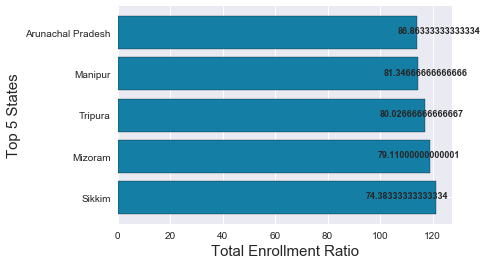

In [24]:
plt.barh(top.top_ten_states.index.values,top.top_ten_states["Average"],color = '#157EA5', edgecolor='black')
plt.xlabel("Total Enrollment Ratio", fontsize = 15)
plt.ylabel("Top 5 States", fontsize = 15)

for i, v in enumerate(vals4):
    plt.text(v + 20, i - .02, str(v), fontsize = 9, fontweight='bold')

5 States with Least Enrollment Ratio: 

In [90]:
def least(df_enrolNew):
    '''
    This function will give the least ten states that has highest enrollment ratio.
    '''
    states = pd.DataFrame(df_enrolNew.groupby("State_UT")["Average"].sum())
    Avg_state = states.sort_values(by='Average')
    least.top_ten_states = Avg_state.iloc[0:5]
    vals4 = top_ten_states["Average"].values
    return vals4


In [91]:
least(df_enrolNew)
print("States with Least Enrollment Ratio :",least.top_ten_states)


States with Least Enrollment Ratio :                      Average
State_UT                    
Jammu And Kashmir  74.383333
Uttar Pradesh      79.110000
Andhra Pradesh     80.026667
Daman & Diu        81.346667
Rajasthan          86.863333


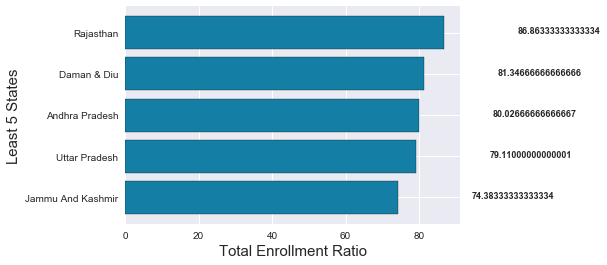

In [31]:
plt.barh(least.top_ten_states.index.values,top_ten_states["Average"],color = '#157EA5', edgecolor='black')
plt.xlabel("Total Enrollment Ratio", fontsize = 15)
plt.ylabel("Least 5 States", fontsize = 15)

for i, v in enumerate(vals4):
    plt.text(v + 20, i - .02, str(v), fontsize = 9, fontweight='bold')


Data Pre-Processing:
Forming a new dataframe combining the columns "Primary" "Upper_Primary" "Secondary" "Higher_Secondary" from all six datasets. 

In [34]:
df_E = df_enrol[df_enrol.Year == '2014-15']

In [ ]:
#Selecting the below columns since the quantify the four different levels of education best. 

In [35]:
df_E = df_E [['State_UT','Primary_Total','Upper_Primary_Total','Secondary_Total','Higher_Secondary_Total']]

In [36]:
df_E.columns=['State','E_Primary','E_Upper_Primary','E_Secondary','E_High_Sec']

In [37]:
df_E .head()

,State,E_Primary,E_Upper_Primary,E_Secondary,E_High_Sec
73,Andaman & Nicobar Islands,90.92,87.62,92.88,95.65
74,Andhra Pradesh,88.21,79.47,72.40,51.63
75,Arunachal Pradesh,128.13,122.53,91.62,68.71
76,Assam,114.96,95.86,74.78,33.97
77,Bihar,101.09,98.07,69.09,31.79


In [38]:
df_enrol.columns

Index(['State_UT', 'Year', 'Primary_Boys', 'Primary_Girls', 'Primary_Total',
       'Upper_Primary_Boys', 'Upper_Primary_Girls', 'Upper_Primary_Total',
       'Secondary_Boys', 'Secondary_Girls', 'Secondary_Total',
       'Higher_Secondary_Boys', 'Higher_Secondary_Girls',
       'Higher_Secondary_Total'],
      dtype='object')

In [39]:
df_comp = pd.read_csv("schools_with_computer.csv")
df_elec =  pd.read_csv("schools_with_electricity.csv")

In [40]:
df_comp.columns

Index(['State_UT', 'year', 'Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools'],
      dtype='object')

In [41]:
df_comp= df_comp[df_comp.year == '2014-15']

In [42]:
df_comp = df_comp [['State_UT','Primary_Only','Primary_with_U_Primary','U_Primary_With_Sec','Sec_with_HrSec.']]

In [43]:
df_comp.columns=['State','C_Primary','C_Upper_Primary','C_Secondary','C_High_Sec']

In [44]:
df_comp.head()

,State,C_Primary,C_Upper_Primary,C_Secondary,C_High_Sec
1,Andaman & Nicobar Islands,30.94,76.54,0.00,100.00
4,Andhra Pradesh,10.29,44.15,76.59,66.67
7,Arunachal Pradesh,4.06,43.83,81.58,62.96
10,Assam,1.13,30.75,61.40,36.97
13,Bihar,2.29,11.15,15.14,46.43


States with least percentage of computer facility in schools:

In [45]:
df_comp['Average']=df_comp[['C_Primary','C_Upper_Primary' ,'C_Secondary', 'C_High_Sec']].mean(axis=1)

In [94]:
def leastComp(df_comp):
    states = pd.DataFrame(df_comp.groupby("State")["Average"].sum())
    Avg_state = states.sort_values(by='Average')
    leastComp.top_ten_states = Avg_state.iloc[0:5]
    vals4 = top_ten_states["Average"].values
    return vals4


In [95]:
leastComp(df_comp)
print("Least 5 states by percentage of availability of computer facility:",leastComp.top_ten_states)

Least 5 states by percentage of availability of computer facility:                Average
State                 
Mizoram        14.5450
Odisha         16.6475
Tripura        17.3550
Bihar          18.7525
Uttar Pradesh  20.3825


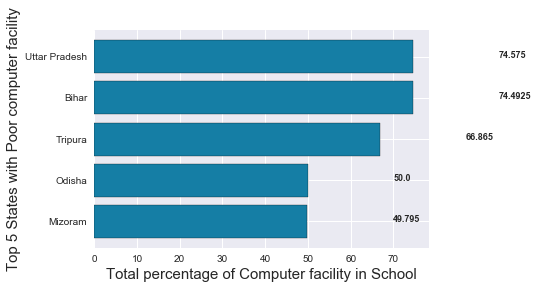

In [96]:
plt.barh(leastComp.top_ten_states.index.values,top_ten_states["Average"],color = '#157EA5', edgecolor='black')
plt.xlabel("Total percentage of Computer facility in School", fontsize = 15)
plt.ylabel("Top 5 States with Poor computer facility", fontsize = 15)

for i, v in enumerate(vals4):
    plt.text(v + 20, i - .02, str(v), fontsize = 9, fontweight='bold')

States with Least percentage Electricity availability in Schools:

In [49]:
df_elec= df_elec[df_elec.year == '2014-15']

In [50]:
df_elec = df_elec [['State_UT','Primary_Only','Primary_with_U_Primary','U_Primary_With_Sec','Sec_with_HrSec.']]

In [51]:
df_elec.columns=['State','EL_Primary','EL_Upper_Primary','EL_Secondary','EL_High_Sec']

In [52]:
df_elec.head()

,State,EL_Primary,EL_Upper_Primary,EL_Secondary,EL_High_Sec
1,Andaman & Nicobar Islands,80.72,96.30,0.00,100.00
4,Andhra Pradesh,91.08,94.70,97.11,83.33
7,Arunachal Pradesh,21.53,54.96,92.11,100.00
10,Assam,11.50,56.42,75.75,59.51
13,Bihar,13.76,36.32,33.07,47.95


In [53]:
df_elec['Average']=df_elec[['EL_Primary','EL_Upper_Primary' ,'EL_Secondary', 'EL_High_Sec']].mean(axis=1)

In [97]:
def leastEl(df_elec):
    '''
    This function will give the least ten states with regards to  Electricity facility.
    '''
    
    states = pd.DataFrame(df_elec.groupby("State")["Average"].sum())
    Avg_state = states.sort_values(by='Average')
    leastEl.top_ten_states = Avg_state.iloc[0:5]
    vals4 = top_ten_states["Average"].values
    return vals4


In [98]:
leastEl(df_elec)
print("Percentage Electricity facility in the least 5 states:",leastEl.top_ten_states)

Percentage Electricity facility in the least 5 states:            Average
State             
Tripura    26.7675
Odisha     30.7125
Bihar      32.7750
Mizoram    35.6100
Jharkhand  39.4225


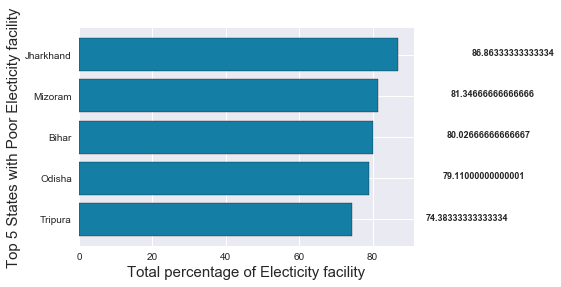

In [56]:
plt.barh(leastEl.top_ten_states.index.values,top_ten_states["Average"],color = '#157EA5', edgecolor='black')
plt.xlabel("Total percentage of Electicity facility", fontsize = 15)
plt.ylabel("Top 5 States with Poor Electicity facility", fontsize = 15)

for i, v in enumerate(vals4):
    plt.text(v + 20, i - .02, str(v), fontsize = 9, fontweight='bold')

In [57]:
df_water = pd.read_csv("schools_with_water_1.csv")


In [58]:
df_water= df_water[df_water.Year == '2014-15']

In [59]:
df_water = df_water [['State/UT','Primary_Only','Primary_with_U_Primary','U_Primary_With_Sec','Sec_with_HrSec.']]

In [60]:
df_water.columns=['State','W_Primary','W_Upper_Primary','W_Secondary','W_High_Sec']

In [61]:
df_water.head()

,State,W_Primary,W_Upper_Primary,W_Secondary,W_High_Sec
1,Andaman & Nicobar Islands,99.55,98.77,0.00,100.00
4,Andhra Pradesh,91.85,96.07,97.48,100.00
7,Arunachal Pradesh,73.34,89.99,94.74,88.89
10,Assam,81.76,92.63,94.17,85.56
13,Bihar,87.54,98.34,98.01,98.27


In [62]:
df_water['Average']=df_water[['W_Primary','W_Upper_Primary' ,'W_Secondary', 'W_High_Sec']].mean(axis=1)

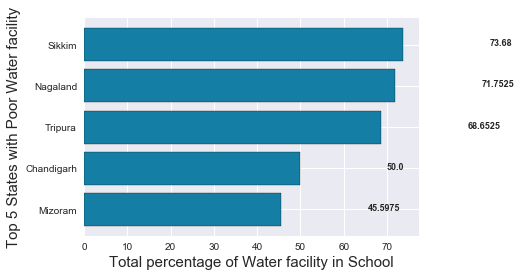

In [63]:
states = pd.DataFrame(df_water.groupby("State")["Average"].sum())
Avg_state = states.sort_values(by='Average')
top_ten_states = Avg_state.iloc[0:5]
vals4 = top_ten_states["Average"].values



plt.barh(top_ten_states.index.values,top_ten_states["Average"],color = '#157EA5', edgecolor='black')
plt.xlabel("Total percentage of Water facility in School", fontsize = 15)
plt.ylabel("Top 5 States with Poor Water facility", fontsize = 15)

for i, v in enumerate(vals4):
    plt.text(v + 20, i - .02, str(v), fontsize = 9, fontweight='bold')

In [64]:
df_bwash = pd.read_csv("schools_with_btoilet.csv")
df_gwash = pd.read_csv("schools_with_gtoilet.csv")

In [65]:
df_bwash= df_bwash[df_bwash.year == '2014-15']

In [66]:
df_bwash = df_bwash [['State_UT','Primary_Only','Primary_with_U_Primary','U_Primary_With_Sec','Sec_with_HrSec.']]

In [67]:
df_bwash.columns=['State','B_Primary','B_Upper_Primary','B_Secondary','B_High_Sec']

In [68]:
df_bwash['Average']=df_bwash[['B_Primary','B_Upper_Primary' ,'B_Secondary', 'B_High_Sec']].mean(axis=1)

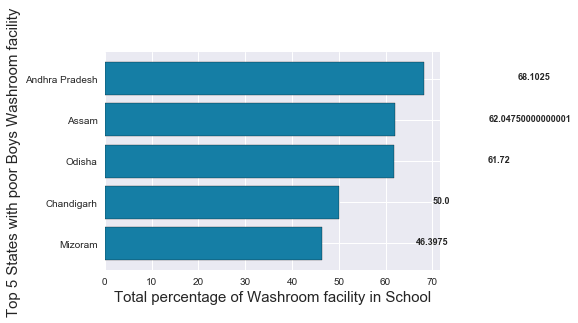

In [69]:
states = pd.DataFrame(df_bwash.groupby("State")["Average"].sum())
Avg_state = states.sort_values(by='Average')
top_ten_states = Avg_state.iloc[0:5]
vals4 = top_ten_states["Average"].values



plt.barh(top_ten_states.index.values,top_ten_states["Average"],color = '#157EA5', edgecolor='black')
plt.xlabel("Total percentage of Washroom facility in School", fontsize = 15)
plt.ylabel("Top 5 States with poor Boys Washroom facility", fontsize = 15)

for i, v in enumerate(vals4):
    plt.text(v + 20, i - .02, str(v), fontsize = 9, fontweight='bold')

In [70]:
df_gwash= df_gwash[df_gwash.year == '2014-15']

In [71]:
df_gwash = df_gwash [['State_UT','Primary_Only','Primary_with_U_Primary','U_Primary_With_Sec','Sec_with_HrSec.']]

In [72]:
df_gwash.columns=['State','G_Primary','G_Upper_Primary','G_Secondary','G_High_Sec']

In [73]:
df_gwash['Average']=df_gwash[['G_Primary','G_Upper_Primary' ,'G_Secondary', 'G_High_Sec']].mean(axis=1)

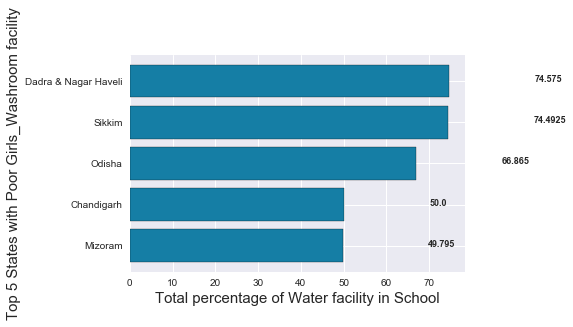

In [74]:
states = pd.DataFrame(df_gwash.groupby("State")["Average"].sum())
Avg_state = states.sort_values(by='Average')
top_ten_states = Avg_state.iloc[0:5]
vals4 = top_ten_states["Average"].values



plt.barh(top_ten_states.index.values,top_ten_states["Average"],color = '#157EA5', edgecolor='black')
plt.xlabel("Total percentage of Water facility in School", fontsize = 15)
plt.ylabel("Top 5 States with Poor Girls_Washroom facility", fontsize = 15)

for i, v in enumerate(vals4):
    plt.text(v + 20, i - .02, str(v), fontsize = 9, fontweight='bold')

In [75]:
df1=pd.merge(df_E, df_comp, how='inner', on=['State'])

In [76]:
df1=pd.merge(df1, df_elec, how='inner', on=['State'])

In [77]:
df1=pd.merge(df1, df_water, how='inner', on=['State'])

In [78]:
df1=pd.merge(df1,df_bwash,how='inner', on=['State'])

In [79]:
df1=pd.merge(df1,df_gwash,how='inner', on=['State'])

#Mizoram and Odisha are states that is repeatedly there in the states with poor facilities list. 
#But tend to have good enrollment ratio despite the poor facilities.

In [80]:
df1[df1['State']=='Mizoram']

,State,E_Primary,E_Upper_Primary,E_Secondary,E_High_Sec,C_Primary,C_Upper_Primary,C_Secondary,C_High_Sec,Average_x,...,B_Primary,B_Upper_Primary,B_Secondary,B_High_Sec,Average_y,G_Primary,G_Upper_Primary,G_Secondary,G_High_Sec,Average
23,Mizoram,122.66,126.83,108.15,62.11,8.31,49.87,0.0,0.0,14.545,...,97.29,88.3,0.0,0.0,46.3975,99.94,99.24,0.0,0.0,49.795


In [81]:
df1[df1['State']=='Odisha']

,State,E_Primary,E_Upper_Primary,E_Secondary,E_High_Sec,C_Primary,C_Upper_Primary,C_Secondary,C_High_Sec,Average_x,...,B_Primary,B_Upper_Primary,B_Secondary,B_High_Sec,Average_y,G_Primary,G_Upper_Primary,G_Secondary,G_High_Sec,Average
25,Odisha,105.53,90.13,77.06,@,3.58,18.47,44.54,0.0,16.6475,...,81.58,84.97,80.33,0.0,61.72,86.46,92.04,88.96,0.0,66.865


In [83]:
#df=df1.groupby(['E_Primary','E_Upper_Primary','E_Secondary,....'])['State'].sum().reset_index(name='State')

In [ ]:
#Not going with the single group by clause becasue I am not able to get the desired output when my dropdown list is changed
#and the respective values are assigned to the selected "State"

In [86]:
choose_state = pw.Dropdown(description = "Choose State",
                            options = ['Andaman Nicobar Islands', 'Andhra Pradesh', 'Assam', 'Bihar', 'Chandigarh',
                                       'Dadra Nagar Haveli','Daman Diu', 'Delhi', 'Goa', 'Gujarat', 
                                       'Haryana','Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
                                       'Karnataka', 'Kerala', 'Lakshadweep','Madhya Pradesh', 'Maharashtra', 
                                       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland','Odisha', 'Puducherry', 
                                       'Punjab', 'Rajasthan', 'Sikkim','Tamil Nadu', 'Telangana','Tripura','Uttar Pradesh',
                                       'Uttarakhand','West Bengal'],
                            value = "Tamil Nadu")
                         

Primary = df1.groupby("State")["E_Primary"].sum()
Upper_Primary = df1.groupby("State")["E_Upper_Primary"].sum()
Secondary = df1.groupby("State")["E_Secondary"].sum()
Higher_Secondary = df1.groupby("State")["E_High_Sec"].sum()
E_Primary = df1.groupby("State")["EL_Primary"].sum()
E_Upper_Primary = df1.groupby("State")["EL_Upper_Primary"].sum()
E_Secondary = df1.groupby("State")["EL_Secondary"].sum()
E_Higher_Secondary = df1.groupby("State")["EL_High_Sec"].sum()
C_Primary = df1.groupby("State")["C_Primary"].sum()
C_Upper_Primary = df1.groupby("State")["C_Upper_Primary"].sum()
C_Secondary = df1.groupby("State")["C_Secondary"].sum()
C_Higher_Secondary = df1.groupby("State")["C_High_Sec"].sum()
W_Primary = df1.groupby("State")["W_Primary"].sum()
W_Upper_Primary = df1.groupby("State")["W_Upper_Primary"].sum()
W_Secondary = df1.groupby("State")["W_Secondary"].sum()
W_Higher_Secondary = df1.groupby("State")["W_High_Sec"].sum()
B_Primary = df1.groupby("State")["B_Primary"].sum()
B_Upper_Primary = df1.groupby("State")["B_Upper_Primary"].sum()
B_Secondary = df1.groupby("State")["B_Secondary"].sum()
B_Higher_Secondary = df1.groupby("State")["B_High_Sec"].sum()
G_Primary = df1.groupby("State")["G_Primary"].sum()
G_Upper_Primary = df1.groupby("State")["G_Upper_Primary"].sum()
G_Secondary = df1.groupby("State")["G_Secondary"].sum()
G_Higher_Secondary = df1.groupby("State")["G_High_Sec"].sum()



def change_state(change):
    a = Primary[choose_state.value]
    b = Upper_Primary[choose_state.value]
    c = Secondary[choose_state.value]
    d = Higher_Secondary[choose_state.value]
    e= E_Primary[choose_state.value]
    f= E_Upper_Primary[choose_state.value]
    g= E_Secondary[choose_state.value]
    h= E_Higher_Secondary[choose_state.value]
    i= C_Primary[choose_state.value]
    j= C_Upper_Primary[choose_state.value]
    k= C_Secondary[choose_state.value]
    l= C_Higher_Secondary[choose_state.value]
    m= W_Primary[choose_state.value]
    n= W_Upper_Primary[choose_state.value]
    o= W_Secondary[choose_state.value]
    p= W_Higher_Secondary[choose_state.value]
    q= B_Primary[choose_state.value]
    r= B_Upper_Primary[choose_state.value]
    s= B_Secondary[choose_state.value]
    t= B_Higher_Secondary[choose_state.value]
    u= G_Primary[choose_state.value]
    v= G_Upper_Primary[choose_state.value]
    w= G_Secondary[choose_state.value]
    x= G_Higher_Secondary[choose_state.value]
     
       
    marks = (a,e,i,m,q,u,b,f,j,n,r,v,c,g,k,o,s,w,d,h,l,p,t,x)
    scatters.x = labels
    scatters.y = marks

labels = ("Primary","E","C","W","BW","GW","UpperPri","uE","uC","uW","uBW","uGW","Sec","sE","sC","sW","sBW","sGW","HSec","hE","hC","hW","hBW","hGW")
a= Primary["Tamil Nadu"]
b = Upper_Primary["Tamil Nadu"]
c = Secondary["Tamil Nadu"]
d = Higher_Secondary["Tamil Nadu"]
e= E_Primary["Tamil Nadu"]
f= E_Upper_Primary["Tamil Nadu"]
g= E_Secondary["Tamil Nadu"]
h= E_Higher_Secondary["Tamil Nadu"]
i= C_Primary["Tamil Nadu"]
j= C_Upper_Primary["Tamil Nadu"]
k= C_Secondary["Tamil Nadu"]
l= C_Higher_Secondary["Tamil Nadu"]
m= W_Primary["Tamil Nadu"]
n= W_Upper_Primary["Tamil Nadu"]
o= W_Secondary["Tamil Nadu"]
p= W_Higher_Secondary["Tamil Nadu"]
q= B_Primary["Tamil Nadu"]
r= B_Upper_Primary["Tamil Nadu"]
s= B_Secondary["Tamil Nadu"]
t= B_Higher_Secondary["Tamil Nadu"]
u= G_Primary["Tamil Nadu"]
v= G_Upper_Primary["Tamil Nadu"]
w= G_Secondary["Tamil Nadu"]
x= G_Higher_Secondary["Tamil Nadu"]



marks = [a,e,i,m,q,u,b,f,j,n,r,v,c,g,k,o,s,w,d,h,l,p,t,x]

choose_state.observe(change_state)

x_sc = bqplot.OrdinalScale()
y_sc = bqplot.LinearScale()

x_ax = bqplot.Axis(scale = x_sc, label = "Facilities in Different Levels")
y_ax = bqplot.Axis(scale = y_sc , label = "Percentage", orientation = 'vertical')

tooltip = bqplot.Tooltip(fields = ["x","y"])
scatters = bqplot.Scatter(x = labels,
                         y = marks,
                         scales = {'x': x_sc, 'y': y_sc},
                         tooltip = tooltip,
                         colors=['#3182BD'], stroke='black')
fig = bqplot.Figure(marks = [scatters],axes =[x_ax, y_ax])

In [87]:
display(choose_state)
display(fig)

Dropdown(description='Choose State', index=28, options=('Andaman Nicobar Islands', 'Andhra Pradesh', 'Assam', …

Figure(axes=[Axis(label='Facilities in Different Levels', scale=OrdinalScale()), Axis(label='Percentage', orie…

Conclusion:


After analysing the data through graphs, I came to a conclusion that there is no particular relationship between enrollment ratio and the school facilities.